# Tree Heights Analysis - FINT30 Dataset

Analysis of tree heights (in meters) with statistics and visualizations focused on Basin and Sub_Basin data.
Export of quartile statistics (Q25, Q50, Q75) by Cod_Plg_2_.

## 1. Import Required Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load the FINT30 Dataset

In [18]:
# Change to the workspace directory
import os
os.chdir(r'C:\Users\jdelhoyo\PhD\Study cases\Genissiat\RV Characterization\repo-github')

# Load the FINT30 dataset
data_path = Path('data/FINT30.csv')
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully from {data_path}")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully from data\FINT30.csv
Dataset shape: (67248, 14)


## 3. Explore the Dataset Structure

In [19]:
# Display dataset information
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67248 entries, 0 to 67247
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    67248 non-null  int64  
 1   Join_Count  67248 non-null  int64  
 2   TARGET_FID  67248 non-null  int64  
 3   Height      67248 non-null  float64
 4   Dominance   67248 non-null  int64  
 5   POINT_X     67248 non-null  float64
 6   POINT_Y     67248 non-null  float64
 7   Id_Data_2   67248 non-null  int64  
 8   Id_Place_2  67248 non-null  int64  
 9   Basin_3     67248 non-null  object 
 10  Sub_Basin_  67248 non-null  object 
 11  Stand_Co_1  67248 non-null  object 
 12  Bank_2      67248 non-null  object 
 13  Cod_Plg_2_  67248 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 7.2+ MB
None

First few rows:
   OBJECTID  Join_Count  TARGET_FID  Height  Dominance   POINT_X    POINT_Y  \
0     56076           2       56324    15.5          3  98

## 4. Calculate Overall Height Statistics

In [20]:
# Identify the height column
height_col = None
for col in df.columns:
    if 'height' in col.lower() or 'altura' in col.lower() or 'h' == col.lower():
        height_col = col
        break

if height_col is None and len(df.columns) > 0:
    height_col = df.columns[0]

print(f"Using column '{height_col}' for height analysis\n")

# Calculate comprehensive statistics for heights
height_stats = {
    'Mean': df[height_col].mean(),
    'Median': df[height_col].median(),
    'Std Dev': df[height_col].std(),
    'Min': df[height_col].min(),
    'Max': df[height_col].max(),
    'Q1 (25%)': df[height_col].quantile(0.25),
    'Q3 (75%)': df[height_col].quantile(0.75),
    'IQR': df[height_col].quantile(0.75) - df[height_col].quantile(0.25),
    'Count': df[height_col].count(),
    'Missing': df[height_col].isna().sum()
}

height_stats_df = pd.DataFrame(height_stats, index=[0]).T
height_stats_df.columns = ['Value']
print("Height Statistics (in meters):")
print(height_stats_df)

Using column 'Height' for height analysis

Height Statistics (in meters):
                 Value
Mean         19.577916
Median       19.500000
Std Dev       6.987175
Min           5.000000
Max          40.000000
Q1 (25%)     14.500000
Q3 (75%)     24.500000
IQR          10.000000
Count     67248.000000
Missing       0.000000


## 5. Height Statistics by Basin and Sub_Basin

In [21]:
# Basin_3 statistics
print("Height statistics grouped by Basin_3:")
print("=" * 70)
basin_stats = df.groupby('Basin_3')[height_col].agg([
    'count', 'mean', 'median', 'std', 'min', 'max', 
    ('Q25', lambda x: x.quantile(0.25)),
    ('Q75', lambda x: x.quantile(0.75))
]).round(2)
print(basin_stats)
print()

# Sub_Basin_ statistics
print("\nHeight statistics grouped by Sub_Basin_:")
print("=" * 70)
sub_basin_stats = df.groupby('Sub_Basin_')[height_col].agg([
    'count', 'mean', 'median', 'std', 'min', 'max',
    ('Q25', lambda x: x.quantile(0.25)),
    ('Q75', lambda x: x.quantile(0.75))
]).round(2)
print(sub_basin_stats)
print()

Height statistics grouped by Basin_3:
           count   mean  median   std  min   max   Q25   Q75
Basin_3                                                     
Arve       40474  18.60    18.2  7.03  5.0  40.0  13.4  23.5
Rhone      11520  20.19    20.4  6.21  5.0  40.0  16.3  24.1
Valserine  15254  21.72    22.1  6.90  5.0  40.0  16.8  26.6


Height statistics grouped by Sub_Basin_:
            count   mean  median   std  min   max    Q25   Q75
Sub_Basin_                                                    
Arve        23771  17.98    17.6  6.84  5.0  40.0  13.00  22.6
Giffre      10617  19.14    18.6  7.42  5.0  40.0  13.70  24.3
Menoge       6086  20.05    20.3  6.75  5.0  39.8  15.30  24.9
Rhone       11520  20.19    20.4  6.21  5.0  40.0  16.30  24.1
Semine       4514  23.21    23.9  6.90  5.2  39.7  18.62  28.2
Valserine   10740  21.09    21.3  6.81  5.0  40.0  16.20  25.8



## 6. Height Distributions by Basin and Sub_Basin

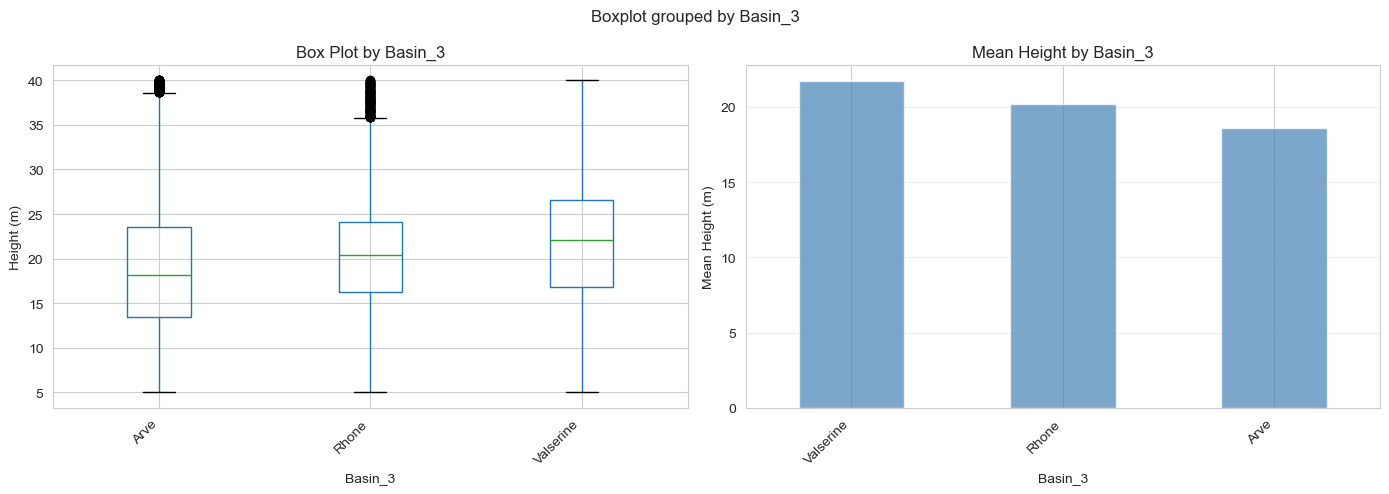

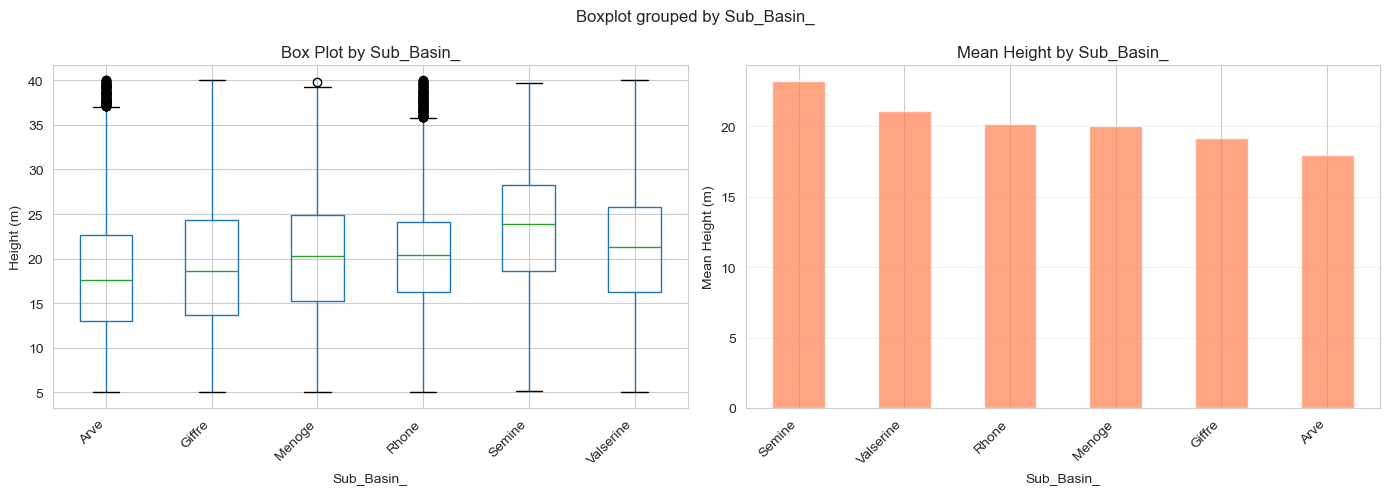

In [22]:
# Basin_3: Box plot and bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Height Analysis by Basin_3', fontsize=14, fontweight='bold')

# Box plot by Basin_3
df.boxplot(column=height_col, by='Basin_3', ax=axes[0])
axes[0].set_xlabel('Basin_3')
axes[0].set_ylabel(f'{height_col} (m)')
axes[0].set_title('Box Plot by Basin_3')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Mean heights by Basin_3
mean_heights_basin = df.groupby('Basin_3')[height_col].mean().sort_values(ascending=False)
mean_heights_basin.plot(kind='bar', ax=axes[1], color='steelblue', alpha=0.7)
axes[1].set_xlabel('Basin_3')
axes[1].set_ylabel(f'Mean {height_col} (m)')
axes[1].set_title('Mean Height by Basin_3')
axes[1].grid(True, alpha=0.3, axis='y')
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('figures/height_by_basin.png', dpi=300, bbox_inches='tight')
plt.show()

# Sub_Basin_: Box plot and bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Height Analysis by Sub_Basin_', fontsize=14, fontweight='bold')

# Box plot by Sub_Basin_
df.boxplot(column=height_col, by='Sub_Basin_', ax=axes[0])
axes[0].set_xlabel('Sub_Basin_')
axes[0].set_ylabel(f'{height_col} (m)')
axes[0].set_title('Box Plot by Sub_Basin_')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Mean heights by Sub_Basin_
mean_heights_sub_basin = df.groupby('Sub_Basin_')[height_col].mean().sort_values(ascending=False)
mean_heights_sub_basin.plot(kind='bar', ax=axes[1], color='coral', alpha=0.7)
axes[1].set_xlabel('Sub_Basin_')
axes[1].set_ylabel(f'Mean {height_col} (m)')
axes[1].set_title('Mean Height by Sub_Basin_')
axes[1].grid(True, alpha=0.3, axis='y')
plt.sca(axes[1])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('figures/height_by_sub_basin.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Export Quartile Statistics by Cod_Plg_2_

In [23]:
# Calculate Q25, Q50 (median), and Q75 for each Cod_Plg_2_
quartile_stats = df.groupby('Cod_Plg_2_')[height_col].agg([
    ('Q25', lambda x: x.quantile(0.25)),
    ('Q50_Median', lambda x: x.quantile(0.50)),
    ('Q75', lambda x: x.quantile(0.75)),
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std')
]).round(2)

# Rename index for clarity
quartile_stats.index.name = 'Cod_Plg_2_'
quartile_stats = quartile_stats.reset_index()

# Save to CSV
output_path = Path('data/FINT30_Quartiles_by_Cod_Plg_2.csv')
quartile_stats.to_csv(output_path, index=False)

print(f"Quartile statistics exported to: {output_path}")
print(f"\nFirst 20 rows:")
print(quartile_stats.head(20))

Quartile statistics exported to: data\FINT30_Quartiles_by_Cod_Plg_2.csv

First 20 rows:
     Cod_Plg_2_    Q25  Q50_Median    Q75  Count   Mean   Std
0     A-A1-Left  12.80       17.60  22.70    310  17.60  6.76
1    A-A1-Right  16.10       23.10  28.80   1042  22.47  7.83
2    A-A10-Left  11.10       14.50  17.00    323  14.29  4.14
3   A-A10-Right  12.20       15.50  18.40    583  15.37  4.75
4    A-A11-Left  10.00       13.75  17.50    778  13.99  5.22
5   A-A11-Right   9.30       12.40  16.50    699  12.97  4.80
6    A-A12-Left  10.60       15.30  20.10    839  15.60  6.07
7   A-A12-Right   8.30       12.20  17.20    797  13.17  5.62
8    A-A13-Left  16.50       21.40  26.20    830  21.05  6.95
9   A-A13-Right  17.70       22.10  25.40   1198  21.34  6.08
10   A-A14-Left  16.48       21.90  25.22    428  20.69  6.34
11  A-A14-Right  16.25       20.10  24.30    747  19.96  5.72
12   A-A15-Left  13.50       18.25  22.68    526  18.02  6.13
13  A-A15-Right  15.00       18.50  22.68   

## 8. Summary Report

In [24]:
print("=" * 80)
print("SUMMARY REPORT - FINT30 Dataset Tree Heights Analysis")
print("=" * 80)
print()

print(f"Dataset Information:")
print(f"  - Total records: {len(df)}")
print(f"  - Missing values in {height_col}: {df[height_col].isna().sum()}")
print(f"  - Valid records: {df[height_col].count()}")
print()

print(f"Overall Height Statistics (in meters):")
print(f"  - Mean: {df[height_col].mean():.2f} m")
print(f"  - Median: {df[height_col].median():.2f} m")
print(f"  - Std Dev: {df[height_col].std():.2f} m")
print(f"  - Range: {df[height_col].min():.2f} m to {df[height_col].max():.2f} m")
print()

print("Basin_3 Analysis:")
for idx, row in basin_stats.iterrows():
    print(f"  {idx}: Mean = {row['mean']:.2f}m, Median = {row['median']:.2f}m, Q25 = {row['Q25']:.2f}m, Q75 = {row['Q75']:.2f}m (n={int(row['count'])})") 

print()
print("-" * 80)
print("Sub_Basin_ Analysis:")
for idx, row in sub_basin_stats.iterrows():
    print(f"  {idx}: Mean = {row['mean']:.2f}m, Median = {row['median']:.2f}m, Q25 = {row['Q25']:.2f}m, Q75 = {row['Q75']:.2f}m (n={int(row['count'])})") 

print()
print("=" * 80)
print("Analysis complete!")
print("  - Visualizations saved in 'figures' folder")
print(f"  - Quartile statistics exported to: data/FINT30_Quartiles_by_Cod_Plg_2.csv")
print("=" * 80)

SUMMARY REPORT - FINT30 Dataset Tree Heights Analysis

Dataset Information:
  - Total records: 67248
  - Missing values in Height: 0
  - Valid records: 67248

Overall Height Statistics (in meters):
  - Mean: 19.58 m
  - Median: 19.50 m
  - Std Dev: 6.99 m
  - Range: 5.00 m to 40.00 m

Basin_3 Analysis:
  Arve: Mean = 18.60m, Median = 18.20m, Q25 = 13.40m, Q75 = 23.50m (n=40474)
  Rhone: Mean = 20.19m, Median = 20.40m, Q25 = 16.30m, Q75 = 24.10m (n=11520)
  Valserine: Mean = 21.72m, Median = 22.10m, Q25 = 16.80m, Q75 = 26.60m (n=15254)

--------------------------------------------------------------------------------
Sub_Basin_ Analysis:
  Arve: Mean = 17.98m, Median = 17.60m, Q25 = 13.00m, Q75 = 22.60m (n=23771)
  Giffre: Mean = 19.14m, Median = 18.60m, Q25 = 13.70m, Q75 = 24.30m (n=10617)
  Menoge: Mean = 20.05m, Median = 20.30m, Q25 = 15.30m, Q75 = 24.90m (n=6086)
  Rhone: Mean = 20.19m, Median = 20.40m, Q25 = 16.30m, Q75 = 24.10m (n=11520)
  Semine: Mean = 23.21m, Median = 23.90m, Q2